In [305]:
from quandl import get
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.linear_model import LinearRegression as lr
from matplotlib import pyplot, style
from pandas import DataFrame
import numpy

In [306]:
style.use("ggplot")

In [307]:
key = open("../key").read()[:-1]
df = get("XFRA/SES", authtoken = key)

In [308]:
def labol_detect(open_v, close_v):
    if (close_v - open_v) > (open_v / 100):
        return 1
    else:
        return 0

In [309]:
df["labol"] = list(map(labol_detect, df["Open"], df["Close"]))

In [310]:
df = df.fillna(0)
x = numpy.array(df.drop(["labol"], 1))
y = numpy.array(df["labol"])
x = preprocessing.scale(x)

In [311]:
len_x = len(x)
br_point = int((len_x / 100) * 70)
x_now = x[:br_point]
x_fut = x[br_point:]
y_now = y[:br_point]
y_fut = y[br_point:]
x_train, x_test, y_train, y_test = ttsplit(x_now, y_now, test_size = 0.2)

In [312]:
buy_signal_lr = lr(n_jobs = 10)
buy_signal_lr.fit(x_train, y_train)
buy_signal_lr.score(x_test, y_test)

0.6402527847342344

In [313]:
buy_signal_svm = svm.SVR(gamma = "scale")
buy_signal_svm.fit(x_train, y_train)
buy_signal_svm.score(x_test, y_test)

0.10189065194311499

In [314]:
forecast_set_lr = buy_signal_lr.predict(x_fut)
forecast_set_svm = buy_signal_lr.predict(x_fut)

In [315]:
nan_row = [[numpy.nan] * 7] * len_x
df_realsig = DataFrame(x_now.tolist() + nan_row[br_point:], columns = list(df.columns)[:-1], index = df.index)
df_futsig = DataFrame(nan_row[:br_point] + x_fut.tolist(), columns = list(df.columns)[:-1], index = df.index)

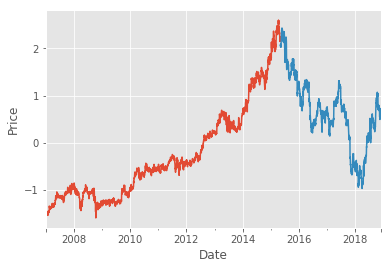

In [316]:
df_realsig["Close"].plot()
df_futsig["Close"].plot()
pyplot.xlabel("Date")
pyplot.ylabel("Price")
pyplot.show()